# The Effects of COVID-19 Lockdown on Air Pollution in LA County 

# Overview

For our project we decided to look at two important problems in the world right now: the COVID-19 pandemic and air pollution. We specifically focused on LA County, to figure out whether the COVID-19 lockdown regulations had contributed to an improvement in air quality. We started by visualizing and comparing the AQI levels of the pollutants pm2.5, O3, NO2, and CO, from the years 2018, 2019, and 2020. We found that three out of the four pollutants had a significant drop in 2020. We also analyzed weather trends in order to see if there was a major fluctuation which could have contributed to the significant drop in pollution in 2020. All in all, after considering possible confounding variables and performing multiple analyses to compare the pollution level between different years, we came to the conclusion that the regulations imposed by the COVID-19 lockdown is most likely the reason for the improvement in air quality in LA County.

# Names

- Aaron Chen
- Cathleen Pena
- Ian Rebmann
- Sandra Villamar

# Research Question

Has the air quality—in particular, the level of CO, NO2, O3, or pm2.5—changed in Los Angeles County since the COVID-19 lockdown regulations were in place? How did it change? Can we conclude that the COVID-19 lockdown is a reasonable guess for this change? Or are there other factors such as weather that may have contributed to a change in the air pollution?

# Background and Prior Work

Our group decided to choose a question related to COVID-19 because we felt that this pandemic is by far the most prevalent factor that has significantly changed our daily lives in the past weeks. In addition, we wanted to incorporate our other interest with environment-related topics. Therefore, we discussed in what ways the COVID-19 lockdown has affected our normal activities and noticed that the lockdown could have an impact on the level of air pollution. We wanted to see if there is a change in air pollution and if so, how significant this change is. We specifically chose Los Angeles County because we wanted to choose an area in California that is known to have poor air quality as well as an area with a big population, since our findings could then be relevant to a greater audience.  

This question is important to ask because improving air quality has proven to be a prominent topic that has consistently shown up in nationwide as well as worldwide discussions. In the United States alone, “the cost of poor air quality to the U.S. from air pollution related illness has been estimated at $150 billion per year [1].” This is because poor air quality leads to several respiratory and cardiovascular health problems, affecting individuals as well as entire communities. Moreover, sensitive ecosystems can and have been damaged as well. That being said, if the lockdown has indeed contributed to an improvement in air quality, then LA County (as well as other counties) could continue to restrict certain activities that are possible in a remote setting. On the other hand, if the lockdown has not contributed to a significant change in air pollution, then we will know to focus on other possible sources in search for finding a solution for better air quality. 

While searching for our topic, we came across a data science project that studied the change in air pollution in Lombardy, Italy, comparing current COVID-19 lockdown dates to previous years [2]. The data scientists explored air quality data from NO2, Benzene, SO2, pm2.5, and pm10, across the years 2018, 2019, and 2020. They discovered a significant drop in some pollutants and no change in others. They also looked at other natural factors that are known to affect air quality such as wind, temperature, and precipitation, to see how they changed in relation to the decrease of some pollutant levels. They considered these weather factors because sunshine and heat cause pollutants to undergo chemical reactions faster, contributing to the development of smog. On the other hand, rain and wind help wash away pollutants or spread them out from a particular area, which typically results in improved air quality [3]. Nonetheless, after this analysis, they concluded that the intensity of human activity is the only factor that significantly changed throughout the years and is hence a reasonable guess to why the air quality improved in Lombardy, Italy.  

Another study posted to the *World Economic Forum* found that some of the world's most polluted cities have seen a large improvement in air quality [4]. In order to show this, the scientists plotted levels of various pollutants in India, China, and South Korea. They also displayed satellite images of these locations taken before and during the COVID-19 lockdown. Both of these visualizations demonstrated how drastic the change in air quality was in these regions, after just a few weeks of lockdown regulations.

**References:**
- [1] https://www.weather.gov/sti/stimodeling_airquality_background
- [2] https://towardsdatascience.com/is-covid-19-lockdown-cleaning-the-skies-over-milan-42dbba1ec812
- [3] https://www.weather.gov/wrn/summer-article-clearing-the-air
- [4] https://www.weforum.org/agenda/2020/04/coronavirus-covid19-air-pollution-enviroment-nature-lockdown

# Hypothesis

We hypothesize that all four pollutants have significantly reduced in level in Los Angeles County due to the COVID-19 lockdown. We believe this because activities such as transportation and manufacturing have notably decreased due to the restrictions of the lockdown. These are all known sources that contribute to air pollution.

# Datasets

#### Dataset #1
- Dataset Name: Los Angeles Downtown Weather 
- [Link to Weather Dataset!](https://www.ncdc.noaa.gov/cdo-web/confirmation)
- Number of observations: 855
- Description: This dataset contains information on the weather in downtown Los Angeles. It contains the station ID and name, the date the data was collected, and the average windspeed, precipitation, and maximum and minimum temperature for that day. The station and name are nominal data, date is ordinal data, and the rest of the data are numerical. We will be using this dataset to see if there were any significant weather changes that could correlate to a possible change in pollutant levels during the COVID-19 lockdown.

#### Dataset #2
- Dataset Name: Los Angeles North Main Street Air Quality 
- [Link to Air Quaility Dataset!](https://aqicn.org/city/los-angeles/)
- Number of observations: 2311
- Description: This dataset contains information on the pollutant levels for each day in downtown Los Angeles. It contains the date the data was collected as well as the AQI (air quality index) level for the pollutants pm2.5, pm10, O3, NO2, SO2, and CO. Date is ordinal data and the pollutant levels are numerical data. We will use this dataset to find out if there is a relationship between air pollution and lockdown regulations.

#### Other:
For point of reference, we got the lockdown dates and other information [HERE!](https://www.gov.ca.gov/california-takes-action-to-combat-covid-19/)

# Setup

In [2]:
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import scipy as sp
from scipy import interpolate
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Data Cleaning

### Load  and Clean Datasets:

In [3]:
dfw = pd.read_csv("Los_Angeles_Downtown_Weather.csv")
dfaqi = pd.read_csv("Los_Angeles_North_Main_Street_Air_Quality.csv")
display(dfw.head(3))
display(dfaqi.head(3))

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1/1/2018,0.22,0.0,71,47
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1/2/2018,0.67,0.0,78,52
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1/3/2018,0.22,0.0,74,53


,date,pm25,pm10,o3,no2,so2,co
0,5/2/2020,55,29,34,9,,2
1,5/3/2020,48,22,27,6,1,2
2,5/4/2020,37,34,39,12,1,3


#### Rename and Drop Unnecessary Columns:

In [4]:
dfw = dfw.drop(columns=['NAME','STATION'])
dfw.columns = ['date', 'average wind speed', 'precipitation', 'max temp', 'min temp']
dfaqi.columns = ['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
dfaqi = dfaqi.drop(columns=['pm10', 'so2'])

#### Filter Data from 2018 until 2020:

In [5]:
dfw['date'] = pd.to_datetime(dfw['date'], errors='coerce')
dfaqi['date'] = pd.to_datetime(dfaqi['date'], errors='coerce')

dfw = dfw.sort_values(by='date').reset_index(drop=True).drop_duplicates()
dfaqi = dfaqi.sort_values(by='date').reset_index(drop=True).drop_duplicates()

#start dfaqi at Jan 1, 2018
dfaqi = dfaqi[dfaqi['date'].dt.year >= 2018]
              
#end dfaqi at May 8, 2020    
#drop last date: 2020-05-09 since 3/4 pollutants are missing values for this day
dfaqi = dfaqi.drop(dfaqi.tail(1).index)
dfaqi.tail()

,date,pm25,o3,no2,co
2305,2020-05-04,37,39,12,3
2306,2020-05-05,56,47,17,4
2307,2020-05-06,57,52,21,4
2308,2020-05-07,55,64,20,4
2309,2020-05-08,59,25,25,6


#### Check Missing Entries:

In [6]:
dfaqi[(dfaqi['pm25'] == ' ')]

,date,pm25,o3,no2,co
1817,2019-01-01,,25,20,6
2080,2019-09-21,,53,17,5
2081,2019-09-22,,50,18,6
2082,2019-09-23,,37,16,4
2083,2019-09-24,,30,20,6
2084,2019-09-25,,38,16,3
2181,2020-01-01,,25,19,5
2276,2020-04-05,,21,2,1
2277,2020-04-06,,27,5,1
2278,2020-04-07,,23,9,2


In [7]:
dfaqi[(dfaqi['o3'] == ' ')]

,date,pm25,o3,no2,co
1516,2018-03-06,31,,26,12
1816,2018-12-31,53,,,
2180,2019-12-30,56,,,


In [8]:
dfaqi[(dfaqi['no2'] == ' ')]

,date,pm25,o3,no2,co
1816,2018-12-31,53,,,
2180,2019-12-30,56,,,


In [9]:
dfaqi[(dfaqi['co'] == ' ')]

,date,pm25,o3,no2,co
1816,2018-12-31,53,,,
2164,2019-12-14,85,9,21,
2165,2019-12-15,79,29,11,
2166,2019-12-16,25,20,26,
2167,2019-12-17,31,22,26,
2170,2019-12-20,55,18,29,
2180,2019-12-30,56,,,


#### Fix Missing Entries:

Since there are only a handful of missing entries and they are missing at random, we decided that the missing values will not greatly perturb our results or contribute to any substantial biases. We replace these missing values by the integer 0 (since no other entry in the dataset has a 0 entry), and make note of these missing values when we continue on to our visualizations and analyses.

In [10]:
#replace missing values by 0
dfaqi = dfaqi.replace(' ', '0')

#### Check  and Fix Data Types:

In [11]:
print(dfw.dtypes)
print()
print(dfaqi.dtypes)

date                  datetime64[ns]
average wind speed           float64
precipitation                float64
max temp                       int64
min temp                       int64
dtype: object

date    datetime64[ns]
pm25            object
o3              object
no2             object
co              object
dtype: object


In [12]:
dfaqi = dfaqi.astype({'pm25': 'int32', 'o3': 'int32', 'no2': 'int32', 'co': 'int32'})

In [13]:
print(dfw.dtypes)
print()
print(dfaqi.dtypes)

date                  datetime64[ns]
average wind speed           float64
precipitation                float64
max temp                       int64
min temp                       int64
dtype: object

date    datetime64[ns]
pm25             int32
o3               int32
no2              int32
co               int32
dtype: object


#### Separate dataframes into years for future analyses:

In [14]:
dfw2018=dfw[dfw['date'].dt.year == 2018].sort_values(by='date').reset_index(drop=True)
dfw2019=dfw[dfw['date'].dt.year == 2019].sort_values(by='date').reset_index(drop=True)
dfw2020=dfw[dfw['date'].dt.year == 2020].sort_values(by='date').reset_index(drop=True)

In [15]:
dfaqi2018=dfaqi[dfaqi['date'].dt.year == 2018].sort_values(by='date').reset_index(drop=True)
dfaqi2019=dfaqi[dfaqi['date'].dt.year == 2019].sort_values(by='date').reset_index(drop=True)
dfaqi2020=dfaqi[dfaqi['date'].dt.year == 2020].sort_values(by='date').reset_index(drop=True)

In [16]:
# add pollutant columns to weather data frames 
dfw2018['no2'] = dfaqi2018['no2']
dfw2019['no2'] = dfaqi2019['no2']
dfw2020['no2'] = dfaqi2020['no2']
dfw2018['o3'] = dfaqi2018['o3']
dfw2019['o3'] = dfaqi2019['o3']
dfw2020['o3'] = dfaqi2020['o3']
dfw2018['pm25'] = dfaqi2018['pm25']
dfw2019['pm25'] = dfaqi2019['pm25']
dfw2020['pm25'] = dfaqi2020['pm25']
dfw2018['co'] = dfaqi2018['co']
dfw2019['co'] = dfaqi2019['co']
dfw2020['co'] = dfaqi2020['co']

#### Summary:
The data have been checked for missing values, converted into the correct types, filtered to include the relevant dates, and placed under the correct column names. Now that the data are clean, we move on to visualizing and analyzing!

# Data Analysis & Results

### Line Graphs of Pollution Levels in 2018, 2019, 2020:
We create line graphs in order to visualize the pollutant levels over the first phase lockdown time period (March 19th to May 8th). We use this time period for 2018, 2019, and 2020, so that we can clearly compare and see any possible differences in pollution between the years.

#### Line Graph for pm2.5:

First, we set up new dataframes that are filtered from the dfaqi dataframe, in order to only include the data from the lockdown dates for each year. Then, since 2020 has a few missing values during the lockdown period, we remove those dates from the 2020 dataframe.

In [17]:
#only use dates from March 19 to May 8
lockdown_dates_2018 = (dfaqi['date'] >= '2018-3-19') & (dfaqi['date'] <= '2018-5-8')
lockdown_dates_2019 = (dfaqi['date'] >= '2019-3-19') & (dfaqi['date'] <= '2019-5-8')
lockdown_dates_2020 = (dfaqi['date'] >= '2020-3-19') & (dfaqi['date'] <= '2020-5-8')

#create dataframe for pm25 during lockdown dates
df_pm25_lockdown = dfaqi.loc[:,['date', 'pm25']]

#separate data into years
df_pm25_lockdown2018 = df_pm25_lockdown.loc[lockdown_dates_2018]
df_pm25_lockdown2019 = df_pm25_lockdown.loc[lockdown_dates_2019]
df_pm25_lockdown2020 = df_pm25_lockdown.loc[lockdown_dates_2020]

#drop rows with missing values
pm25_dates_missing = ['2020-04-05', '2020-04-06', '2020-04-07']
df_pm25_lockdown2020 = df_pm25_lockdown2020[~df_pm25_lockdown2020['date'].isin(pm25_dates_missing)]

Next, we set up our x (time in days of lockdown) and y (pm2.5 pollution level) values for the plot. We use a spline interpolation for each year so that the lines can show the overall trend of pm2.5 pollution levels better.  

In [18]:
#set x to time in days of lockdown and y to pollution level
x = list(range(0,51))
x = np.array(x)
y2018 = df_pm25_lockdown2018['pm25']
y2018 = np.array(y2018)
y2019 = df_pm25_lockdown2019['pm25']
y2019 = np.array(y2019)
#since 2020 has 3 missing values, it needs a different x value
x2020 = np.delete(x, [17,18,19])
y2020 = df_pm25_lockdown2020['pm25']
y2020 = np.array(y2020)

#resample to get more points - needed to make smooth curve
x_smooth = np.linspace(x.min(), x.max(), 200)

#create splines
spl2018 = interpolate.UnivariateSpline(x, y2018)
spl2019 = interpolate.UnivariateSpline(x, y2019)
spl2020 = interpolate.UnivariateSpline(x2020, y2020)

Finally, we set up the plot with our trend lines from 2018, 2019, and 2020. We also fill in the area where pollution levels in 2020 are below the previous years, in order to make the drop more apparent.

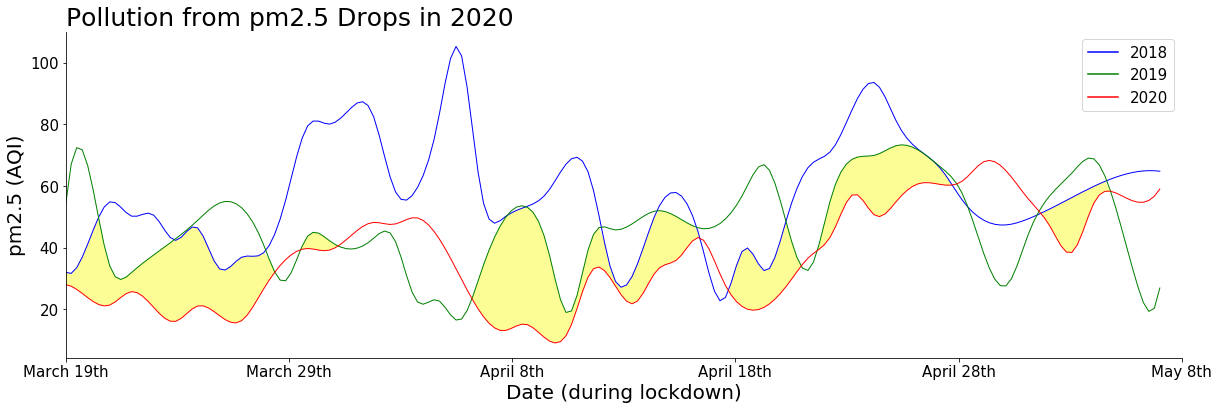

In [19]:
#setup plot
fig, ax = plt.subplots(figsize=(20,6))

#axes
ax.set_xlim(left=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#labels
plt.title("Pollution from pm2.5 Drops in 2020", fontsize=25, loc='left')
plt.xlabel('Date (during lockdown)', fontsize=20)
plt.ylabel('pm2.5 (AQI)', fontsize=20)

#get months on x axis
plt.xticks([0,10.2,20.4,30.6,40.8,51], ["March 19th", "March 29th", "April 8th", "April 18th", "April 28th", "May 8th"], fontsize=15)
plt.yticks(fontsize=15)

#plot lines
line_2018 = plt.plot(x_smooth, spl2018(x_smooth), 'blue', linewidth=1)
line_2019 = plt.plot(x_smooth, spl2019(x_smooth), 'green', linewidth=1)
line_2020 = plt.plot(x_smooth, spl2020(x_smooth), 'red', linewidth=1)

#fill area above 2020 line and below 2018/2019
upper_bound = np.minimum(spl2018(x_smooth), spl2019(x_smooth))
ax.fill_between(x_smooth, spl2020(x_smooth), upper_bound, where=upper_bound >= spl2020(x_smooth), facecolor='#FDFD96', interpolate=True)

#legend
blue_line = mlines.Line2D([], [], color='blue', label='2018')
green_line = mlines.Line2D([], [], color='green', label='2019')
red_line = mlines.Line2D([], [], color='red', label='2020')
plt.legend(handles=[blue_line, green_line, red_line], fontsize=15)

#plot
plt.show()

From this line graph, we can see that for most of the lockdown period, pollution from pm2.5 has dropped relative to the previous years, 2018 and 2019. The only major gap we see from this graph is right before April 8th. However, since we have three missing dates (April 5th, April 6th, and April 7th), the spline interpolation may not have accurately drawn the overall trend. Hence, the gap may be smaller in reality.

#### Line Graph for O3:

Again, we set up new dataframes that are filtered from the dfaqi dataframe, in order to only include the data from the lockdown dates for each year. Since there are no missing values for O3 during these dates, we do not need to remove any data.

In [20]:
#create dataframe for o3 during lockdown dates
df_o3_lockdown = dfaqi.loc[:,['date', 'o3']]

#separate data into years
df_o3_lockdown2018 = df_o3_lockdown.loc[lockdown_dates_2018]
df_o3_lockdown2019 = df_o3_lockdown.loc[lockdown_dates_2019]
df_o3_lockdown2020 = df_o3_lockdown.loc[lockdown_dates_2020]

#no rows with missing data from any year: check!

Then, as we did for pm2.5, we set up our x (time in days of lockdown) and y (O3 pollution level) values for the plot. We use a spline interpolation for each year so that the lines can show the overall trend of O3 pollution levels better.  

In [21]:
#set x to time in days of lockdown and y to pollution level
x = list(range(0,51))
x = np.array(x)
y2018 = df_o3_lockdown2018['o3']
y2018 = np.array(y2018)
y2019 = df_o3_lockdown2019['o3']
y2019 = np.array(y2019)
y2020 = df_o3_lockdown2020['o3']
y2020 = np.array(y2020)

#resample to get more points - needed to make smooth curve
x_smooth = np.linspace(x.min(), x.max(), 200)

#create splines
spl2018 = interpolate.UnivariateSpline(x, y2018)
spl2019 = interpolate.UnivariateSpline(x, y2019)
spl2020 = interpolate.UnivariateSpline(x, y2020)

Finally, we plot our pollution trend lines and fill in the area where pollution levels in 2020 are below the previous years.

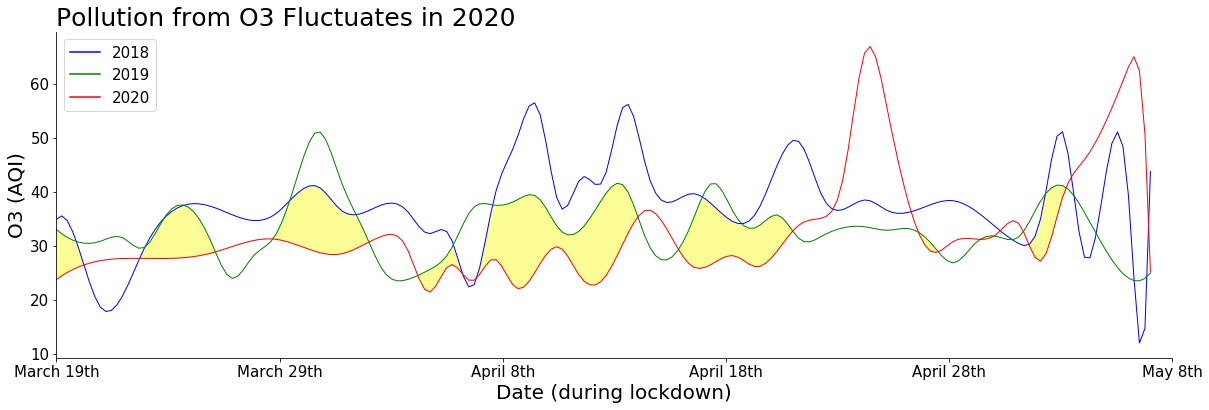

In [22]:
#setup plot
fig, ax = plt.subplots(figsize=(20,6))

#axes
ax.set_xlim(left=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#labels
plt.title("Pollution from O3 Fluctuates in 2020", fontsize=25, loc='left')
plt.xlabel('Date (during lockdown)', fontsize=20)
plt.ylabel('O3 (AQI)', fontsize=20)

#get months on x axis
plt.xticks([0,10.2,20.4,30.6,40.8,51], ["March 19th", "March 29th", "April 8th", "April 18th", "April 28th", "May 8th"], fontsize=15)
plt.yticks(fontsize=15)

#plot lines
line_2018 = plt.plot(x_smooth, spl2018(x_smooth), 'blue', linewidth=1)
line_2019 = plt.plot(x_smooth, spl2019(x_smooth), 'green', linewidth=1)
line_2020 = plt.plot(x_smooth, spl2020(x_smooth), 'red', linewidth=1)

#fill area above 2020 line and below 2018/2019
upper_bound = np.minimum(spl2018(x_smooth), spl2019(x_smooth))
ax.fill_between(x_smooth, spl2020(x_smooth), upper_bound, where=upper_bound >= spl2020(x_smooth), facecolor='#FDFD96', interpolate=True)

#legend
blue_line = mlines.Line2D([], [], color='blue', label='2018')
green_line = mlines.Line2D([], [], color='green', label='2019')
red_line = mlines.Line2D([], [], color='red', label='2020')
plt.legend(handles=[blue_line, green_line, red_line], fontsize=15)

#plot
plt.show()

From this graph, it is not quite clear if the drop in pollution from O3 is significant enough to conclude that the lockdown regulations in 2020 had an impact. From the start of lockdown until about mid-April, most of the area is highlighted yellow, meaning that pollution from O3 had dropped relative to previous years. However, at the end we see two major spikes. One reason for this is that summer was nearing and O3 is known to have a positive correlation with temperature. 

#### Line Graph for NO2:

We set up new dataframes. Since there are no missing values for NO2 during the lockdown dates, we do not need to remove any data. 

In [23]:
#create dataframe for no2 during lockdown dates
df_no2_lockdown = dfaqi.loc[:,['date', 'no2']]

#separate data into years
df_no2_lockdown2018 = df_no2_lockdown.loc[lockdown_dates_2018]
df_no2_lockdown2019 = df_no2_lockdown.loc[lockdown_dates_2019]
df_no2_lockdown2020 = df_no2_lockdown.loc[lockdown_dates_2020]

#no rows with missing data from any year: check!

Then, we use spline interpolation to show the overall trend of NO2 pollution levels better.

In [24]:
#set x to time in days of lockdown and y to pollution level
x = list(range(0,51))
x = np.array(x)
y2018 = df_no2_lockdown2018['no2']
y2018 = np.array(y2018)
y2019 = df_no2_lockdown2019['no2']
y2019 = np.array(y2019)
y2020 = df_no2_lockdown2020['no2']
y2020 = np.array(y2020)

#resample to get more points - needed to make smooth curve
x_smooth = np.linspace(x.min(), x.max(), 200)

#create splines
spl2018 = interpolate.UnivariateSpline(x, y2018)
spl2019 = interpolate.UnivariateSpline(x, y2019)
spl2020 = interpolate.UnivariateSpline(x, y2020)

Finally, we plot our pollution trend lines and fill in the area where pollution levels in 2020 are below the previous years.

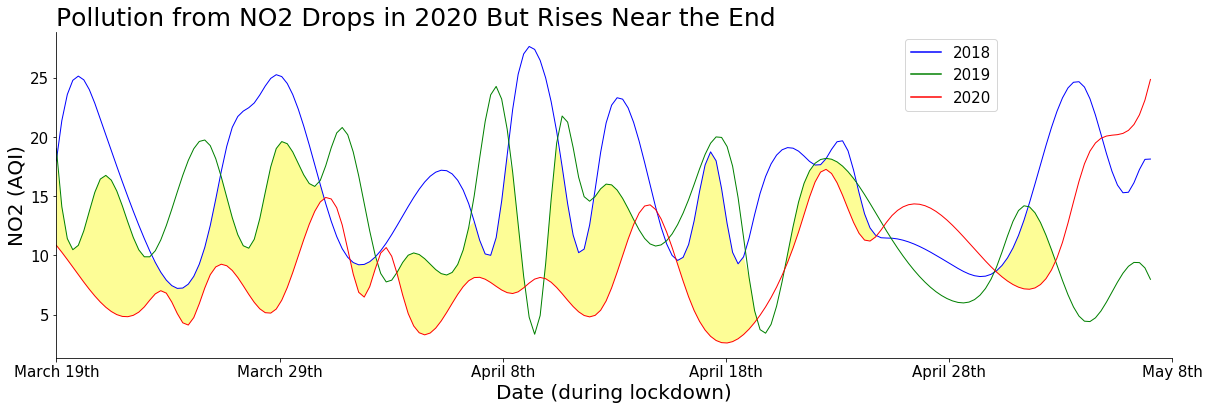

In [25]:
#setup plot
fig, ax = plt.subplots(figsize=(20,6))

#axes
ax.set_xlim(left=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#labels
plt.title("Pollution from NO2 Drops in 2020 But Rises Near the End", fontsize=25, loc='left')
plt.xlabel('Date (during lockdown)', fontsize=20)
plt.ylabel('NO2 (AQI)', fontsize=20)

#get months on x axis
plt.xticks([0,10.2,20.4,30.6,40.8,51], ["March 19th", "March 29th", "April 8th", "April 18th", "April 28th", "May 8th"], fontsize=15)
plt.yticks(fontsize=15)

#plot lines
line_2018 = plt.plot(x_smooth, spl2018(x_smooth), 'blue', linewidth=1)
line_2019 = plt.plot(x_smooth, spl2019(x_smooth), 'green', linewidth=1)
line_2020 = plt.plot(x_smooth, spl2020(x_smooth), 'red', linewidth=1)

#fill area above 2020 line and below 2018/2019
upper_bound = np.minimum(spl2018(x_smooth), spl2019(x_smooth))
ax.fill_between(x_smooth, spl2020(x_smooth), upper_bound, where=upper_bound >= spl2020(x_smooth), facecolor='#FDFD96', interpolate=True)

#legend
blue_line = mlines.Line2D([], [], color='blue', label='2018')
green_line = mlines.Line2D([], [], color='green', label='2019')
red_line = mlines.Line2D([], [], color='red', label='2020')
plt.legend(handles=[blue_line, green_line, red_line], fontsize=15, loc='upper right', bbox_to_anchor=(.85, 1))

#plot
plt.show()

NO2 emissions are primarily due to road traffic and other fossil fuel combustion processes. Because May 9th was the start of the California phase one lockdown plan, in which certain businesses and factories were allowed to re-open, this could explain why NO2 rose in the last portion of this graph. Other than that, the rest of the yellow highlighted area shows that pollution from NO2 was consistently below the previous years.

#### Line Graph for CO:

We set up new dataframes. Since there are no missing values for CO during the lockdown dates, we do not need to remove any data. 

In [26]:
#create dataframe for co during lockdown dates
df_co_lockdown = dfaqi.loc[:,['date', 'co']]

#separate data into years
df_co_lockdown2018 = df_co_lockdown.loc[lockdown_dates_2018]
df_co_lockdown2019 = df_co_lockdown.loc[lockdown_dates_2019]
df_co_lockdown2020 = df_co_lockdown.loc[lockdown_dates_2020]

#no rows with missing data from any year: check!

Then, we use spline interpolation to show the overall trend of CO pollution levels better.

In [27]:
#set x to time in days of lockdown and y to pollution level
x = list(range(0,51))
x = np.array(x)
y2018 = df_co_lockdown2018['co']
y2018 = np.array(y2018)
y2019 = df_co_lockdown2019['co']
y2019 = np.array(y2019)
y2020 = df_co_lockdown2020['co']
y2020 = np.array(y2020)

#resample to get more points - needed to make smooth curve
x_smooth = np.linspace(x.min(), x.max(), 200)

#create splines
spl2018 = interpolate.UnivariateSpline(x, y2018)
spl2019 = interpolate.UnivariateSpline(x, y2019)
spl2020 = interpolate.UnivariateSpline(x, y2020)

Finally, we plot our pollution trend lines and fill in the area where pollution levels in 2020 are below the previous years.

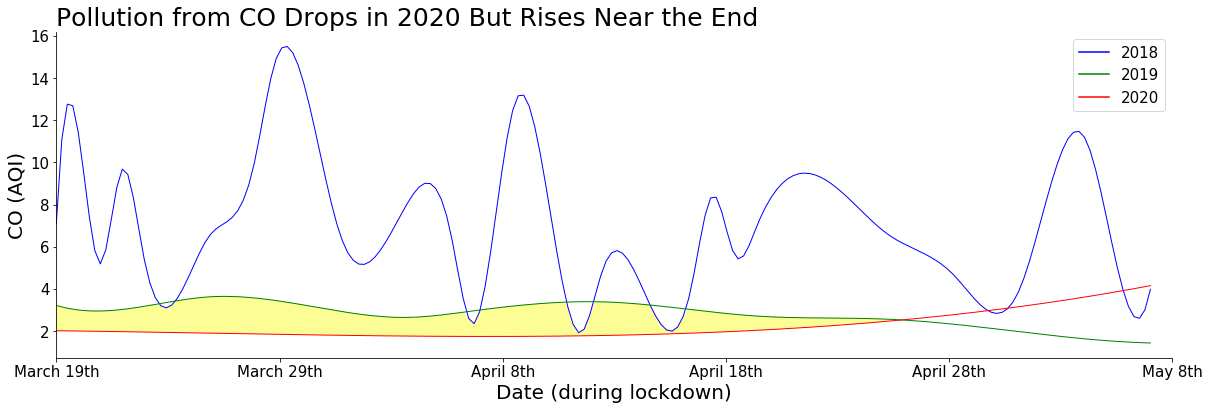

In [28]:
#setup plot
fig, ax = plt.subplots(figsize=(20,6))

#axes
ax.set_xlim(left=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#labels
plt.title("Pollution from CO Drops in 2020 But Rises Near the End", fontsize=25, loc='left')
plt.xlabel('Date (during lockdown)', fontsize=20)
plt.ylabel('CO (AQI)', fontsize=20)

#get months on x axis
plt.xticks([0,10.2,20.4,30.6,40.8,51], ["March 19th", "March 29th", "April 8th", "April 18th", "April 28th", "May 8th"], fontsize=15)
plt.yticks(fontsize=15)

#plot lines
line_2018 = plt.plot(x_smooth, spl2018(x_smooth), 'blue', linewidth=1)
line_2019 = plt.plot(x_smooth, spl2019(x_smooth), 'green', linewidth=1)
line_2020 = plt.plot(x_smooth, spl2020(x_smooth), 'red', linewidth=1)

#fill area above 2020 line and below 2018/2019
upper_bound = np.minimum(spl2018(x_smooth), spl2019(x_smooth))
ax.fill_between(x_smooth, spl2020(x_smooth), upper_bound, where=upper_bound >= spl2020(x_smooth), facecolor='#FDFD96', interpolate=True)

#legend
blue_line = mlines.Line2D([], [], color='blue', label='2018')
green_line = mlines.Line2D([], [], color='green', label='2019')
red_line = mlines.Line2D([], [], color='red', label='2020')
plt.legend(handles=[blue_line, green_line, red_line], fontsize=15)

#plot
plt.show()

We can see that for the majority of the lockdown period, CO levels in 2020 were below those in previous years. At the very end, we see something similar to NO2 in that the pollution levels start to rise. Because CO is also primarily emitted by vehicles, the start of the California phase one lockdown plan could explain why CO rose.

### Correlation Table and Heatmap of Pollutants vs. Weather:

Because we know from prior research that weather factors affect pollution levels, we would like to see which of those factors have significantly high correlations. This way, we can check if during the 2020 lockdown time period, there was a significant change in those highly correlated weather factors. This is important because a change in weather may be the reason for a change in pollution levels, instead of the lockdown regulations themselves.

In [29]:
#merge dataframes and show correlation
df_merged_aqi_weather = pd.merge(dfw, dfaqi, how='inner', on='date')
df_merged_aqi_weather.corr()

,average wind speed,precipitation,max temp,min temp,pm25,o3,no2,co
average wind speed,1.000000,0.395230,-0.291148,-0.030376,-0.232044,0.033568,-0.445918,-0.433771
precipitation,0.395230,1.000000,-0.302615,-0.129657,-0.140618,-0.185885,-0.098853,-0.126229
max temp,-0.291148,-0.302615,1.000000,0.741535,0.313131,0.546337,0.173033,0.193475
min temp,-0.030376,-0.129657,0.741535,1.000000,0.307135,0.502444,-0.333469,-0.182785
pm25,-0.232044,-0.140618,0.313131,0.307135,1.000000,0.208687,0.158397,0.331470
o3,0.033568,-0.185885,0.546337,0.502444,0.208687,1.000000,-0.269954,-0.148409
no2,-0.445918,-0.098853,0.173033,-0.333469,0.158397,-0.269954,1.000000,0.703232
co,-0.433771,-0.126229,0.193475,-0.182785,0.331470,-0.148409,0.703232,1.000000


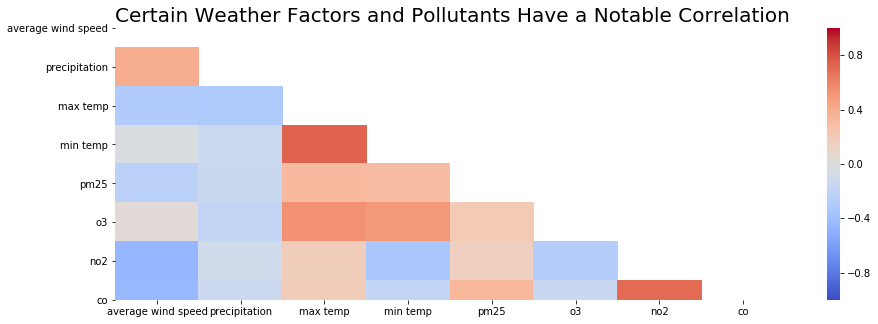

In [31]:
#only show half of heatmap grid, so there is no repetition
mask = np.zeros(df_merged_aqi_weather.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

#setup plot
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Certain Weather Factors and Pollutants Have a Notable Correlation", fontsize=20, loc='left')

#show heatmap
ax = sns.heatmap(df_merged_aqi_weather.corr(), vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = False, mask = mask)
plt.xticks(rotation=0)
plt.show()

The coloring of the heatmap displays high positive correlations in dark red, and high negative correlations in dark blue. Hence, the stronger the correlation, the darker the color. From the correlation table and heatmap above, we can see that some pollutants have a notable correlation to certain weather factors. For example, pm2.5 does not seem to have a strong correlation to any of the weather factors, as the highest correlation we see is about .31 with temperature. O3, on the other hand, has a decently strong (positive) correlation to temperature, measuring to about .55. Finally, NO2 and CO have a notable (negative) correlation to wind speed, measuring to about -.45.

### Weather Line Graphs:

Now that we have seen which weather factors are highly correlated to which pollutants, we can see if any of these weather factors have had major fluctuations during the 2020 lockdown. If there is indeed any major fluctuation, then this could have been a source for the change in pollution levels, instead of just the lockdown regulations.

#### Weather Line Graph for pm2.5:

We set up a graph that shows the overall trend for pm2.5, temperature, rain, and wind. We focus on the year 2020, since we are only interested in potential fluctuations that occurred during the actual lockdown time period.

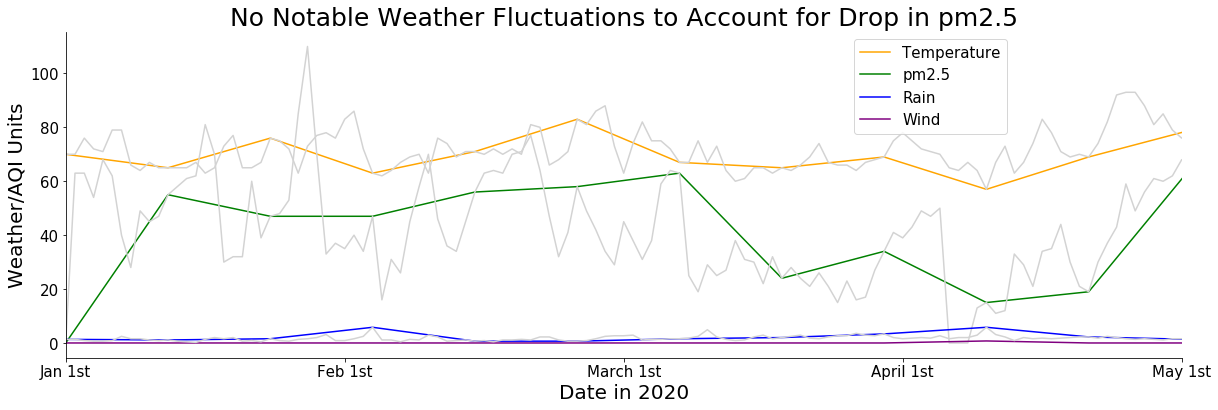

In [38]:
#setup plot
fig, ax = plt.subplots(figsize=(20,6))

#axes
ax.set_xlim(left=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# no2 2020
dfw20s = dfw2020[::11]
ytemp = dfw20s['max temp']
ywind = dfw20s['average wind speed']
ypm25 = dfw20s['pm25']
yrain = dfw20s['precipitation']
plt.plot(ytemp, color='orange',label="temp")
plt.plot(dfw2020['max temp'], color='lightgray')
plt.plot(ypm25, color='green',label="pm25")
plt.plot(dfw2020['pm25'], color='lightgray')
plt.plot(yrain, color='purple',label="rain")
plt.plot(ywind, color='blue',label="wind")
plt.plot(dfw2020['average wind speed'], color='lightgray')

#labels
plt.title("No Notable Weather Fluctuations to Account for Drop in pm2.5", fontsize=25)
plt.xlabel('Date in 2020', fontsize=20)
plt.xticks([0,30,60,90,120], ["Jan 1st", "Feb 1st", "March 1st", "April 1st", "May 1st"], fontsize=15)
plt.ylabel('Weather/AQI Units', fontsize=20)
plt.yticks(fontsize=15)

#legend
blue_line = mlines.Line2D([], [], color='blue', label='Rain')
green_line = mlines.Line2D([], [], color='green', label='pm2.5')
red_line = mlines.Line2D([], [], color='orange', label='Temperature')
purp_line = mlines.Line2D([], [], color='purple', label='Wind')
plt.legend(handles=[red_line, green_line,blue_line, purp_line ], fontsize=15, loc='upper right', bbox_to_anchor=(.85, 1))
plt.show()

Looking at the green line, we can see that pm2.5 had a significant drop when lockdown started (March 19th). We also can see that none of the three weather lines show any major change throughout all of 2020. Hence, we can make a reasonable assumption that weather did not play a role in the drop in pollution from pm2.5.

#### Weather Line Graph for O3:

Next, we set up the graph for O3.

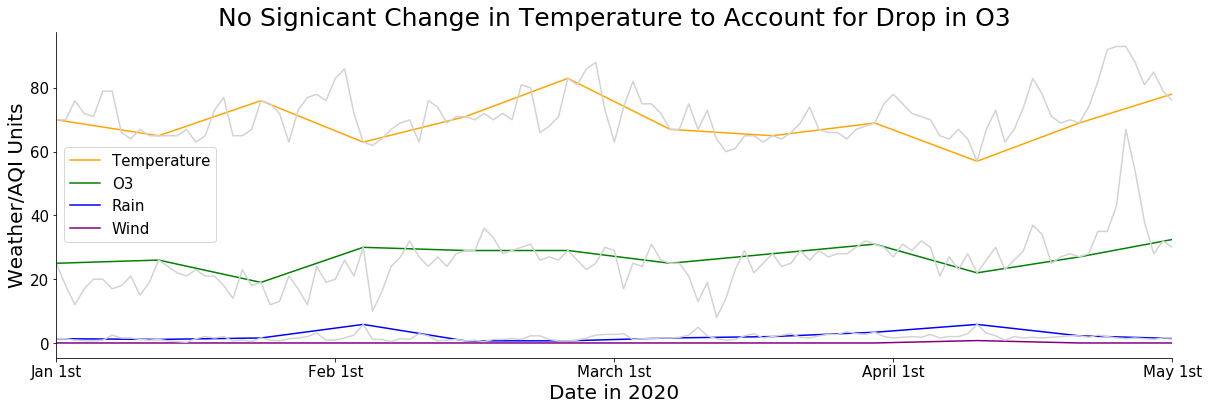

In [35]:
#setup plot
fig, ax = plt.subplots(figsize=(20,6))

#axes
ax.set_xlim(left=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# no2 2020
dfw20s = dfw2020[::11]
ytemp = dfw20s['max temp']
ywind = dfw20s['average wind speed']
yo3 = dfw20s['o3']
yrain = dfw20s['precipitation']
plt.plot(ytemp, color='orange',label="temp")
plt.plot(dfw2020['max temp'], color='lightgray')
plt.plot(yo3, color='green', label="o3")
plt.plot(dfw2020['o3'], color='lightgray')
plt.plot(yrain, color='purple',label="rain")
plt.plot(ywind, color='blue',label="wind")
plt.plot(dfw2020['average wind speed'], color='lightgray')

#labels
plt.title("No Signicant Change in Temperature to Account for Drop in O3", fontsize=25)
plt.ylabel('Weather/AQI Units', fontsize=20)
plt.xlabel('Date in 2020', fontsize=20)
plt.xticks([0,30,60,90,120], ["Jan 1st", "Feb 1st", "March 1st", "April 1st", "May 1st"], fontsize=15)
plt.yticks(fontsize=15)

#legend
blue_line = mlines.Line2D([], [], color='blue', label='Rain')
green_line = mlines.Line2D([], [], color='green', label='O3')
red_line = mlines.Line2D([], [], color='orange', label='Temperature')
purp_line = mlines.Line2D([], [], color='purple', label='Wind')
plt.legend(handles=[red_line, green_line,blue_line, purp_line ], fontsize=15)
plt.show()

From the correlation heatmap earlier, we learned that temperature has a notable positive correlation with O3. Hence, if temperature had gone down during the lockdown period, then this could have been a reason why O3 pollution levels had dropped. However, from the graph we see that the orange line (symbolizing temperature) stays consistent throughout entire 2020. Hence, we can make a reasonable assumption that weather did not play a role in the drop in pollution from O3.

#### Weather Line Graph for NO2:

Next, we set up the graph for NO2.

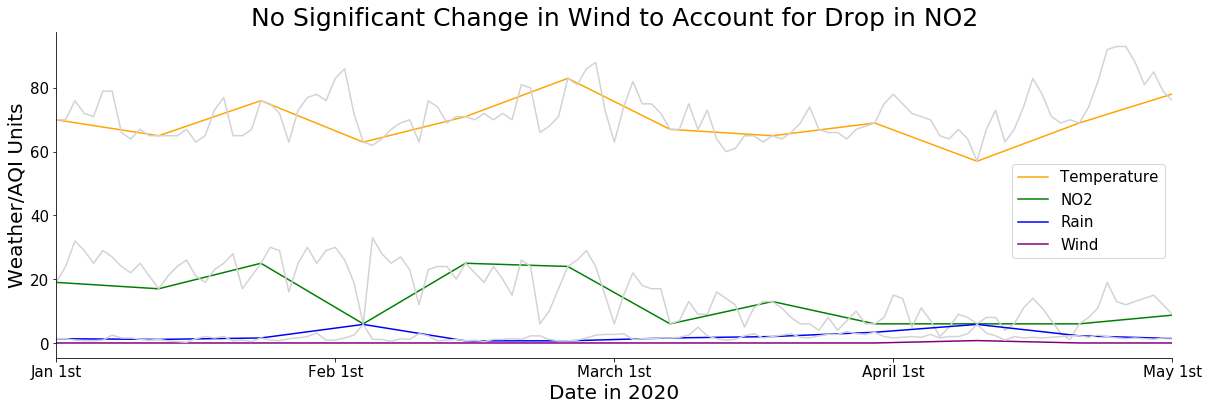

In [43]:
#setup plot
fig, ax = plt.subplots(figsize=(20,6))

#axes
ax.set_xlim(left=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# no2 2020
dfw20s = dfw2020[::11]
ytemp = dfw20s['max temp']
ywind = dfw20s['average wind speed']
yno = dfw20s['no2']
yrain = dfw20s['precipitation']
plt.plot(ytemp, color='orange', label="temp")
plt.plot(dfw2020['max temp'], color='lightgray')
plt.plot(yno, color='green', label="no3")
plt.plot(dfw2020['no2'], color='lightgray')
plt.plot(yrain, color='purple', label="rain")
plt.plot(ywind, color='blue',label="wind")
plt.plot(dfw2020['average wind speed'], color='lightgray',)

#labels
plt.title("No Significant Change in Wind to Account for Drop in NO2", fontsize=25)
plt.ylabel('Weather/AQI Units', fontsize=20)
plt.xlabel('Date in 2020', fontsize=20)
plt.xticks([0,30,60,90,120], ["Jan 1st", "Feb 1st", "March 1st", "April 1st", "May 1st"], fontsize=15)
plt.yticks(fontsize=15)

#legend
blue_line = mlines.Line2D([], [], color='blue', label='Rain')
green_line = mlines.Line2D([], [], color='green', label='NO2')
red_line = mlines.Line2D([], [], color='orange', label='Temperature')
purp_line = mlines.Line2D([], [], color='purple', label='Wind')
plt.legend(handles=[red_line, green_line,blue_line, purp_line ], fontsize=15, loc='center right', bbox_to_anchor=(1, .45))
plt.show()

From the correlation heatmap earlier, we learned that wind speed has a notable negative correlation with NO2. Hence, if wind speed had gone up during the lockdown period, then this could have been a reason why NO2 pollution levels had dropped. However, from the graph we see that the purple line (symbolizing wind speed) stays consistent throughout entire 2020. Hence, we can make a reasonable assumption that weather did not play a role in the drop in pollution from NO2.

#### Weather Line Graph for CO:

Finally, we set up the graph for CO.

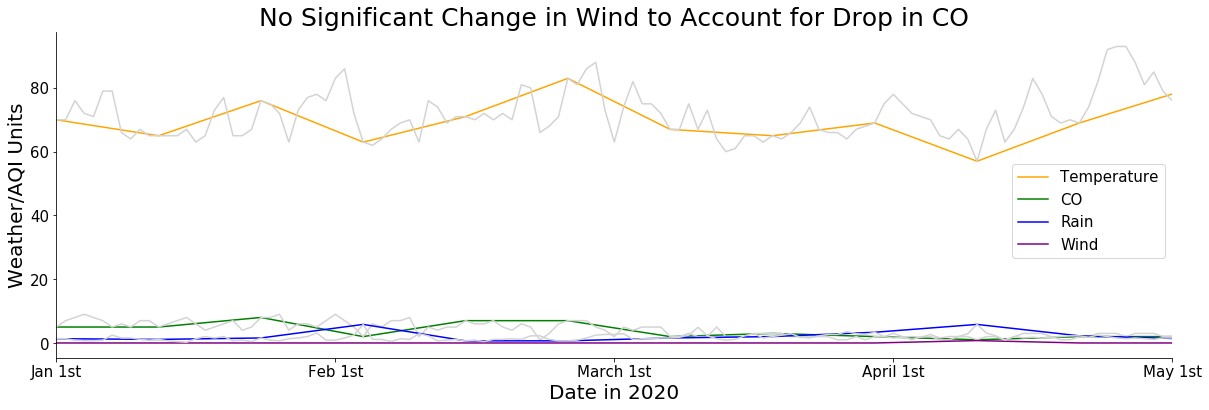

In [46]:
#setup plot
fig, ax = plt.subplots(figsize=(20,6))

#axes
ax.set_xlim(left=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# no2 2020
dfw20s = dfw2020[::11]
ytemp = dfw20s['max temp']
ywind = dfw20s['average wind speed']
yco = dfw20s['co']
yrain = dfw20s['precipitation']
plt.plot(ytemp, color='orange')
plt.plot(dfw2020['max temp'], color='lightgray')
plt.plot(yco, color='green')
plt.plot(dfw2020['co'], color='lightgray')
plt.plot(yrain, color='purple')
plt.plot(ywind, color='blue')
plt.plot(dfw2020['average wind speed'], color='lightgray')

#labels
plt.title("No Significant Change in Wind to Account for Drop in CO", fontsize=25)
plt.ylabel('Weather/AQI Units', fontsize=20)
plt.xlabel('Date in 2020', fontsize=20)
plt.xticks([0,30,60,90,120], ["Jan 1st", "Feb 1st", "March 1st", "April 1st", "May 1st"], fontsize=15)
plt.yticks(fontsize=15)

#legend
blue_line = mlines.Line2D([], [], color='blue', label='Rain')
green_line = mlines.Line2D([], [], color='green', label='CO')
red_line = mlines.Line2D([], [], color='orange', label='Temperature')
purp_line = mlines.Line2D([], [], color='purple', label='Wind')
plt.legend(handles=[red_line, green_line,blue_line, purp_line ], fontsize=15,loc='center right', bbox_to_anchor=(1, .45))
plt.show()

Similar to NO2, we also learned that wind speed has a notable negative correlation with CO. We can see that the purple line representing wind speed does not fluctuate while the green line representing CO drops. Hence, we can make a reasonable assumption that weather did not play a role in the drop in pollution from CO.

#### Summary:

After looking at all four graphs, we do not see any major fluctuations in temperature, wind, or rain, during 2020. We conclude that there must be some other factor (possibly the lockdown regulations) that caused the drops in pollution levels.  

### Boxplots of Pollution Levels through 2018, 2019, and 2020:

We already have an idea of the pollution levels throughout 2018, 2019, and 2020, shown earlier in the line graphs. Next, we will take a closer look at the distributions of the pollution levels throughout each of these years. The following boxplots display the AQI levels of each pollutant. We will use the same timeframe of the first phase lockdown dates of 2020 (March 19th to May 8th), throughout 2018 and 2019 as well. This way, we can compare the air quality during the lockdown in 2020 to previous years' air quality.

#### Boxplot for pm2.5:

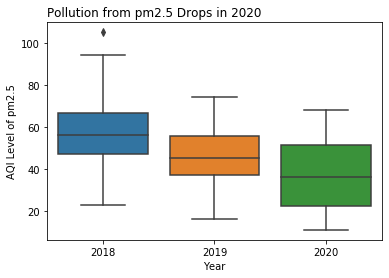

In [34]:
#filter data to only include lockdown dates
df_pm25_lockdown = df_pm25_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]

#drop rows from each year if at least one year has a missing value
pm25_dates_missing_all_years = ['2018-04-05', '2018-04-06', '2018-04-07', '2019-04-05', '2019-04-06', '2019-04-07',
                     '2020-04-05', '2020-04-06', '2020-04-07']
df_pm25_lockdown = df_pm25_lockdown[~df_pm25_lockdown['date'].isin(pm25_dates_missing)]

#add year column
df_pm25_lockdown['year'] = df_pm25_lockdown['date'].dt.year

#set up color palette
years = df_pm25_lockdown['year'].unique()
palette = dict(zip(years, sns.color_palette()))

#generate boxplots
ax = sns.boxplot(x='year', y='pm25', data=df_pm25_lockdown, palette=palette)
ax.set_title('Pollution from pm2.5 Drops in 2020', loc='left')
ax.set_ylabel('AQI Level of pm2.5')
ax.set_xlabel('Year');

We can definitely tell that the pollution from pm2.5 has dropped in 2020. Every part of the box—the interquartile range, median, and whiskers—is lower than both 2018 and 2019. However, we can also see that there is a drop between 2018 and 2019. Hence, there may be a gradual trend downwards from better technology and environmental policies, as opposed to just the lockdown regulations.


#### Boxplot for O3:

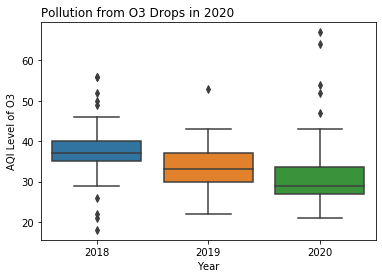

In [35]:
#filter data to only include lockdown dates
df_o3_lockdown = df_o3_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]

#no rows with missing data from any year: check!

#add year column
df_o3_lockdown['year'] = df_o3_lockdown['date'].dt.year

#generate boxplots
ax = sns.boxplot(x='year', y='o3', data=df_o3_lockdown, palette=palette)
ax.set_title('Pollution from O3 Drops in 2020', loc='left')
ax.set_ylabel('AQI Level of O3')
ax.set_xlabel('Year');

Here we see that most of the data from 2019 and 2020 are in the same range of AQI levels, but the median and the interquartile range for 2020 have gone down. Hence, most of the data in 2020 lie at a lower AQI level than in 2019 (and 2018). We will need to see in our analyses if this difference is significant enough.

#### Boxplot for NO2:

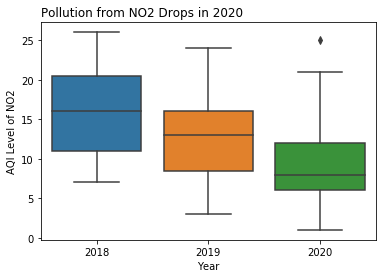

In [36]:
#filter data to only include lockdown dates
df_no2_lockdown = df_no2_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]

#no rows with missing data from any year: check!

#add year column
df_no2_lockdown['year'] = df_no2_lockdown['date'].dt.year

#generate boxplots
ax = sns.boxplot(x='year', y='no2', data=df_no2_lockdown, palette=palette)
ax.set_title('Pollution from NO2 Drops in 2020', loc='left')
ax.set_ylabel('AQI Level of NO2')
ax.set_xlabel('Year');

From this boxplot we see that pollution from NO2 drops in 2020. Similar to the last boxplot, the median and the interquartile range are much farther below that of 2018 and 2019. Also, since the median for 2020 is in the lower part of the box (IQR), this shows that most of the data lie at lower AQI levels than 2018 and 2019.

#### Boxplot for CO:

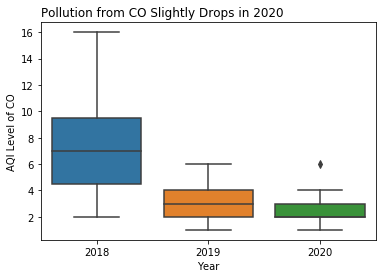

In [37]:
#filter data to only include lockdown dates
df_co_lockdown = df_co_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]

#no rows with missing data from any year: check!

#add year column
df_co_lockdown['year'] = df_co_lockdown['date'].dt.year

#generate boxplots
ax = sns.boxplot(x='year', y='co', data=df_co_lockdown, palette=palette)
ax.set_title('Pollution from CO Slightly Drops in 2020', loc='left')
ax.set_ylabel('AQI Level of CO')
ax.set_xlabel('Year');

In 2018, we see a much higher level of pollution from CO than in 2019 or 2020. The spike in 2018 was due to several environmental policies being lifted under the Trump administration, allowing several industries to pollute much more than previous years. The drop in 2019 was due to the drastic fall in coal production, as other sources of power became cheaper to produce. Looking past the unusual events of that year, when we zoom in on just 2019 and 2020, we still see a drop in CO. Also, since the median in 2020 is at the very bottom of the box, we know that most of the data lie below that of 2019.

### ANOVA Test for Change in Pollutant Levels:

Now that we have visualized the distributions of the pollutants in each year, we will run an ANOVA Test to find out if there is a significant difference in the means of the pollutant levels during the lockdown time period in 2018, 2019, and 2020. We use this approach because this test works well when there are multiple groups to consider (2018, 2019, and 2020).

#### Check Assumptions of ANOVA for pm2.5:
- Residuals are normally distributed
- Homogeneity of variances
- Observations are sampled independently from each other (True)

Let's check the first assumption! We use the Shapiro-Wilk test in order to find out if the residuals are normally distributed.

In [38]:
#get model
model = ols('pm25 ~ C(year)', data=df_pm25_lockdown).fit()

#Shapiro-Wilk, null hypothesis: data is drawn from normal distribution
w, pvalue = sp.stats.shapiro(model.resid)
print(w, pvalue)
if pvalue > .01:
    print("Fail to reject null hypothesis. Residuals are normally distributed.")

0.9838659167289734 0.07666698843240738
Fail to reject null hypothesis. Residuals are normally distributed.


Great, the first assumption has passed. Let's check the second assumption! We use the Bartlett test in order to find out if the variances are homogeneous.

In [39]:
#separate data into years
pm25_2018 = df_pm25_lockdown[df_pm25_lockdown['year'] == 2018]['pm25']
pm25_2019 = df_pm25_lockdown[df_pm25_lockdown['year'] == 2019]['pm25']
pm25_2020 = df_pm25_lockdown[df_pm25_lockdown['year'] == 2020]['pm25']

#Bartlett, null hypothesis: samples from populations have equal variances
w, pvalue = sp.stats.bartlett(pm25_2018, pm25_2019, pm25_2020)
print(w, pvalue)
if pvalue > .01:
    print("Fail to reject null hypothesis. Variances are equal.")

1.8402806806403973 0.3984631167189966
Fail to reject null hypothesis. Variances are equal.


Great, the second assumption has passed. Lastly, we know that the observations were sampled independently from each other. We are ready to start the test.

#### Assumptions passed. Now perform test for pm2.5:

In [40]:
#get ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(year),9738.447500,2.0,18.257658,8.277684e-08
Residual,39204.145833,147.0,NaN,NaN


The p-value we get from the ANOVA test is significant (P<.01) so we can conclude that there are significant differences among the years. To know the pairs of significant different years, we will perform multiple pairwise comparison analysis using the Tukey HSD test.

In [41]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df_pm25_lockdown['pm25'], groups=df_pm25_lockdown['year'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
 2018   2019  -10.7451 -18.4028 -3.0874   True 
 2018   2020  -19.8002 -27.5766 -12.0239  True 
 2019   2020  -9.0551  -16.8315 -1.2788   True 
-----------------------------------------------


The above results from the Tukey HSD test suggest that all pairwise comparisons for the years reject the null hypothesis and indicate statistical significant differences. **In particular, we can conclude that the 2020 lockdown period has pm2.5 pollution levels that are significantly different from the past two years.**

Now we move on to the other three pollutants.

#### Check Assumptions of ANOVA for O3:
- Residuals are normally distributed
- Homogeneity of variances
- Observations are sampled independently from each other (True)

Let's check the first assumption.

In [42]:
#get model
model = ols('o3 ~ C(year)', data=df_o3_lockdown).fit()

#Shapiro-Wilk null hypothesis: data is drawn from normal distribution
w, pvalue = sp.stats.shapiro(model.resid)
print(w, pvalue)
if pvalue > .01:
    print("Fail to reject null hypothesis. Residuals are normally distributed.")
else:
    print("Reject null hypothesis. Residuals are not normally distributed.")

0.896828293800354 6.7878551668343334e-09
Reject null hypothesis. Residuals are not normally distributed.


Looks like we did not pass the first assumption, so we are unable to perform the test. Let's check the remaining two pollutants.

#### Check Assumptions of ANOVA for NO2:
- Residuals are normally distributed
- Homogeneity of variances
- Observations are sampled independently from each other (True)

Let's check the first assumption.

In [43]:
#get model
model = ols('no2 ~ C(year)', data=df_no2_lockdown).fit()

#Shapiro-Wilk null hypothesis: data is drawn from normal distribution
w, pvalue = sp.stats.shapiro(model.resid)
print(w, pvalue)
if pvalue > .01:
    print("Fail to reject null hypothesis. Residuals are normally distributed.")
else:
    print("Reject null hypothesis. Residuals are not normally distributed.")

0.9748375415802002 0.006635130383074284
Reject null hypothesis. Residuals are not normally distributed.


Looks like we did not pass the first assumption, so we are unable to perform the test. Let's check the last pollutant.

#### Check Assumptions of ANOVA for CO:
- Residuals are normally distributed
- Homogeneity of variances
- Observations are sampled independently from each other (True)

Let's check the first assumption.

In [44]:
#get model
model = ols('co ~ C(year)', data=df_co_lockdown).fit()

#use Shapiro-Wilk test to check normal distribution of residuals
#null hypothesis: data is drawn from normal distribution
w, pvalue = sp.stats.shapiro(model.resid)
print(w, pvalue)
if pvalue > .01:
    print("Fail to reject null hypothesis. Residuals are normally distributed.")
else:
    print("Reject null hypothesis. Residuals are not normally distributed.")

0.9343783259391785 1.645439738240384e-06
Reject null hypothesis. Residuals are not normally distributed.


Looks like we did not pass the first assumption, so we are unable to perform the test. Overall, although the ANOVA test did not work for three of the pollutants, we were still able to come to an important conclusion for pm2.5. Next, we will use the permutation test as this test has less assumptions to pass.

### Permutation Test:
In these permutation tests, we are assessing whether the pollutant in question comes from two different distributions. We want to check if whether or not being in lockdown has affected the level of pollutants recorded. Therefore, we will create an extra boolean column in the data telling whether or not LA county was in lockdown during that date. We are using March 19th as the date that lockdown started. We will compare the data for when LA **was** in lockdown versus when LA **was not**. To do this, we will take the average AQI level of each group (lockdown and not lockdown) and use the difference of their means as the test statistic. When doing this on the actual data, it will be called the observed test statistic.

Next, we will simulate data under the null hypothesis which is that being in lockdown has no effect on the AQI levels of the pollutants. To do this, we will shuffle the boolean lockdown column so that they label random data points. We will then calculate the difference in means of the two groups once again. We will repeat this process 1000 times to accumulate 1000 different simulated test statistics that were formed under the null hypothesis. Finally, we will calculate a p-value by counting the number of times the simulated test statistic was greater than or equal to the observed test statistic (difference in means). We will use a significance level of .05 to determine whether or not the results are statistically significant.

To help visualize this process, we will plot a histogram of the distribution of the test statistic when simulated under the null hypothesis. The red dot on the histogram will represent where the observed test statistic actually lies. We will then use a significance level of .05 to determine whether there is a significant difference between the two groups.

The only assumption for the permutation test is that the observations are sampled independently from each other, which we already know is true. Thus, we can start testing!

#### Permutation Test for pm2.5:

In [45]:
lockdown = pd.to_datetime("2020-03-19")
dfaqi2 = dfaqi
dfaqi2['lockdown'] = dfaqi['date']>= lockdown
dfaqi2 = dfaqi2.reset_index(drop=True)
dfaqi2.head(3)

,date,pm25,o3,no2,co,lockdown
0,2018-01-01,133,31,25,14,False
1,2018-01-02,148,19,39,24,False
2,2018-01-03,133,4,41,17,False


In [46]:
pm25_and_lockdown = dfaqi2[['pm25', 'lockdown']]
pm25_and_lockdown = pm25_and_lockdown.replace(0, np.nan)
pm25_and_lockdown = pm25_and_lockdown.dropna()

obs_diff = (pm25_and_lockdown.groupby('lockdown')['pm25'].mean().diff().iloc[-1])
obs_diff

-14.279166666666661

Text(0.5, 0, 'Difference in means')

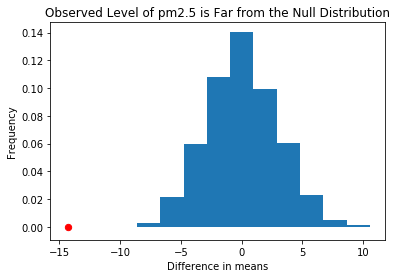

In [47]:
n_repititions = 1000
differences = []

for _ in range(n_repititions):
    shuffled_pm25 = (
    pm25_and_lockdown['pm25']
    .sample(replace=False, frac=1)
    .reset_index(drop=True)
    )
    
    original_and_shuffled = (pm25_and_lockdown.assign(**{'shuffled_pm25': shuffled_pm25}))
    group_means = (original_and_shuffled.groupby('lockdown').mean().loc[:, 'shuffled_pm25'])
    difference = group_means.diff().iloc[-1]
    differences.append(difference)
    
pd.Series(differences).plot(kind='hist', density=True)
plt.scatter(obs_diff, 0, color='red', s=40)
plt.title('Observed Level of pm2.5 is Far from the Null Distribution')
plt.xlabel("Difference in means")

In [48]:
pval = np.count_nonzero(differences<= obs_diff) / n_repititions
pval

0.0

In [49]:
from scipy.stats import ks_2samp
gp1 = pm25_and_lockdown.loc[pm25_and_lockdown.lockdown==True, 'pm25']
gp2 = pm25_and_lockdown.loc[pm25_and_lockdown.lockdown==False, 'pm25']
ks_2samp(gp1, gp2)

Ks_2sampResult(statistic=0.3104166666666666, pvalue=0.0002269265901764143)

With a p-value of zero, we reject our null hypothesis. We conclude that the difference between pm2.5 levels in lockdown versus not in lockdown is statistically significant.

#### Permutation Test for O3:

In [50]:
o3_and_lockdown = dfaqi2[['o3', 'lockdown']]
o3_and_lockdown = o3_and_lockdown.replace(0, np.nan)
o3_and_lockdown = o3_and_lockdown.dropna()

obs_diff = (o3_and_lockdown.groupby('lockdown')['o3'].mean().diff().iloc[-1])
obs_diff

1.2823383084577102

Text(0.5, 0, 'Difference in means')

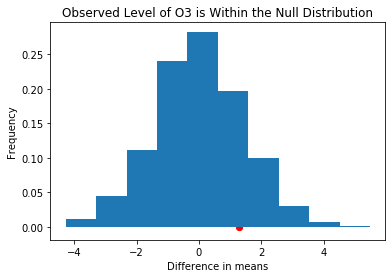

In [51]:
n_repititions = 1000
differences = []

for _ in range(n_repititions):
    shuffled_o3 = (
    o3_and_lockdown['o3']
    .sample(replace=False, frac=1)
    .reset_index(drop=True)
    )
    
    original_and_shuffled = (o3_and_lockdown.assign(**{'shuffled_o3': shuffled_o3}))
    group_means = (original_and_shuffled.groupby('lockdown').mean().loc[:, 'shuffled_o3'])
    difference = group_means.diff().iloc[-1]
    differences.append(difference)
    
pd.Series(differences).plot(kind='hist', density=True)
plt.scatter(obs_diff, 0, color='red', s=40)
plt.title('Observed Level of O3 is Within the Null Distribution')
plt.xlabel("Difference in means")

In [52]:
pval = np.count_nonzero(differences<= obs_diff) / n_repititions
pval

0.814

In [53]:
gp1 = o3_and_lockdown.loc[o3_and_lockdown.lockdown==True, 'o3']
gp2 = o3_and_lockdown.loc[o3_and_lockdown.lockdown==False, 'o3']
ks_2samp(gp1, gp2)

Ks_2sampResult(statistic=0.1695200468247, pvalue=0.11388071203868114)

With a p-value of 0.8, we fail to reject our null hypothesis. We conclude that the difference between O3 levels in lockdown versus not in lockdown is NOT statistically significant.

#### Permutation Test for NO2:

In [54]:
no2_and_lockdown = dfaqi2[['no2', 'lockdown']]
no2_and_lockdown = no2_and_lockdown.replace(0, np.nan)
no2_and_lockdown = no2_and_lockdown.dropna()

obs_diff = (no2_and_lockdown.groupby('lockdown')['no2'].mean().diff().iloc[-1])
obs_diff

-7.29526245280721

Text(0.5, 0, 'Difference in means')

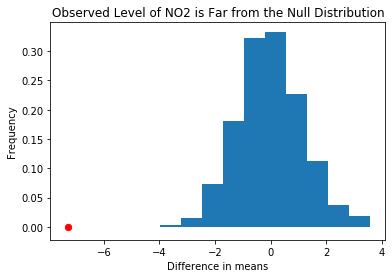

In [55]:
n_repititions = 1000
differences = []

for _ in range(n_repititions):
    shuffled_no2 = (
    no2_and_lockdown['no2']
    .sample(replace=False, frac=1)
    .reset_index(drop=True)
    )
    
    original_and_shuffled = (no2_and_lockdown.assign(**{'shuffled_no2': shuffled_no2}))
    group_means = (original_and_shuffled.groupby('lockdown').mean().loc[:, 'shuffled_no2'])
    difference = group_means.diff().iloc[-1]
    differences.append(difference)
    
pd.Series(differences).plot(kind='hist', density=True)
plt.scatter(obs_diff, 0, color='red', s=40)
plt.title('Observed Level of NO2 is Far from the Null Distribution')
plt.xlabel("Difference in means")

In [56]:
pval = np.count_nonzero(differences<= obs_diff) / n_repititions
pval

0.0

In [57]:
gp1 = no2_and_lockdown.loc[no2_and_lockdown.lockdown==True, 'no2']
gp2 = no2_and_lockdown.loc[no2_and_lockdown.lockdown==False, 'no2']
ks_2samp(gp1, gp2)

Ks_2sampResult(statistic=0.41439532334672996, pvalue=7.307275182512284e-08)

With a p-value of zero, we reject our null hypothesis. We conclude that the difference between NO2 levels in lockdown versus not in lockdown is statistically significant.

#### Permutation Test for CO:

In [58]:
co_and_lockdown = dfaqi2[['co', 'lockdown']]
co_and_lockdown = co_and_lockdown.replace(0, np.nan)
co_and_lockdown = co_and_lockdown.dropna()

obs_diff = (co_and_lockdown.groupby('lockdown')['co'].mean().diff().iloc[-1])
obs_diff

-2.9947058823529416

Text(0.5, 0, 'Difference in means')

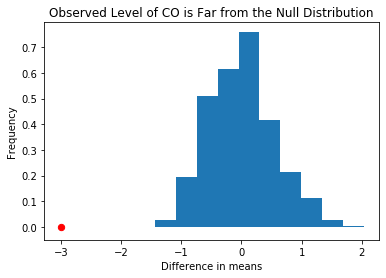

In [59]:
n_repititions = 1000
differences = []

for _ in range(n_repititions):
    shuffled_co = (
    co_and_lockdown['co']
    .sample(replace=False, frac=1)
    .reset_index(drop=True)
    )
    
    original_and_shuffled = (co_and_lockdown.assign(**{'shuffled_co': shuffled_co}))
    group_means = (original_and_shuffled.groupby('lockdown').mean().loc[:, 'shuffled_co'])
    difference = group_means.diff().iloc[-1]
    differences.append(difference)
    
pd.Series(differences).plot(kind='hist', density=True)
plt.scatter(obs_diff, 0, color='red', s=40)
plt.title('Observed Level of CO is Far from the Null Distribution')
plt.xlabel("Difference in means")

In [60]:
pval = np.count_nonzero(differences<= obs_diff) / n_repititions
pval

0.0

In [61]:
gp1 = co_and_lockdown.loc[co_and_lockdown.lockdown==True, 'co']
gp2 = co_and_lockdown.loc[co_and_lockdown.lockdown==False, 'co']
ks_2samp(gp1, gp2)

Ks_2sampResult(statistic=0.5753186274509803, pvalue=9.357127042349965e-15)

With a p-value of zero, we reject our null hypothesis. We conclude that the difference between CO levels in lockdown versus not in lockdown is statistically significant.

#### Summary:

After running the permutation tests on each of the four pollutants, we concluded that pm2.5, NO2, and CO, have significantly different pollution levels during lockdown versus not during lockdown. These results demonstrate that the lockdown regulations indeed had an impact on air pollution in LA County. This could be explained by the many businesses and companies that were forced to shut down, as enforced by the lockdown regulations. As a consequence of this shutdown as well as the discouragement of gatherings, there were less people driving on the road. Therefore, the primary sources that cause pollution had suddenly declined and most likely contributed to the drastic change in pollution levels.

# Ethics & Privacy

The datasets we used are from the *World Air Quality* and the *National Centers for Environmental Information* project websites. Both host an open data platform allowing anyone to download a csv of air quality indexes and weather measurements of locations around the world. These websites give permission to anyone to utilize the data for projects or research. There are no privacy concerns regarding our datasets as the data are purely scientific, only including pollutant and weather measurements. There is no information on humans, their private data, or any other sensitive subjects. Therefore, there is no need to clean data in a way to preserve privacy.

Regarding the collection of the data, we do not believe there are any human biases as the values are obtained through systematic tests. One potential bias, though, is that the station where the weather data are collected is not the same station where the pollutant data are collected. In addition, stations in different parts of LA County may result in different measurements for both weather and pollutant levels. However, by looking up the exact addresses of both the weather and pollutant data stations, we can see that the distance between them is only 5.6 miles, which is minimal relative to the entire county. Both stations are also located in the central downtown area, which is the most populated area of LA County and hence, the most relevant part of the county to analyze. Therefore, we believe that the potential biases in the station locations will not drastically disrupt our analyses.

Regarding our analyses, there may be a potential bias in comparing the non-lockdown time period with the lockdown time period, as there are other factors such as governmental policies that could have affected the pollution levels in the non-lockdown time period. In this case, the difference between lockdown versus non-lockdown pollution levels would be exaggerated due to a factor other than lockdown regulations. Despite this potential bias, though, we believe that since we are comparing the lockdown time period to two years of non-lockdown time period, we have a large timeframe of comparison in which any unusual activity will most likely be minor relative to the overall pollution trend. 

# Conclusion & Discussion

At the start of this project, we questioned whether the air quality in LA County had changed, and whether the COVID-19 lockdown regulations were a reasonable guess for this change. By visualizing the pollution levels in 2018, 2019, and 2020 through line graphs, we began to get an idea of the overall trend. Then, we studied the correlation between weather factors and the four pollutants, and graphed those factors against each pollutant to see if there were any major fluctuations in weather. We found that there were no notable fluctuations and concluded that there must be another reason for the possible change in pollution levels. Lastly, we ran two analyses—ANOVA tests and permutation tests—and found that pm2.5, NO2, and CO, all had statistically significant differences in their pollution levels from lockdown versus not in lockdown. Hence, we concluded that pollution from pm2.5, NO2, and CO, all dropped in 2020 and this drop was most likely due to the COVID-19 lockdown regulations. For O3, we did not see a statistically significant difference in pollution levels and hence came to to the conclusion that lockdown regulations most likely did not have an impact on O3 pollution.

As discussed in the Ethics & Privacy section above, some limitations of our analyses include that there may be more confounding variables (other than weather) that we did not check for. For example, environmental policies or a change in industrial production may have caused differences in pollution levels as well. 

All in all, the goal of our project was to see if the drastic measures used to stop the spread of COVID-19 also had the effect of lowering the level of air pollution in LA County. Our data and analyses showed that there was a significant difference in the pollution levels for three out of four pollutants during the time of the lockdown. This is a vital finding not only for LA County but also for other locations around the world. It proves that improving air quality and slowing down climate change is definitely possible. While our society will probably not be able to take as drastic measures as we did during lockdown, this study has identified the activities that make a difference in air pollution. Therefore, we can focus on looking at those activies to cut back or improve on, such as using electric-powered vehicles instead of gas-powered vehicles as well as minimizing the use of fossil fuels in factories. 

# Team Contributions

Aaron Chen: Question, Overview, Hypothesis, Pollution Over Time Line Graphs, Ethics and Privacy, Conclusion

Cathleen Pena: Question, Hypothesis, Datasets, Setup, Data Cleaning, Correlation Plot, Permutation Tests, Ethics and Privacy, Conclusion

Ian Rebmann: Question, Background, Hypothesis, Weather Over Time Line Graphs

Sandra Villamar: Question, Overview, Background, Hypothesis, Setup, Data Cleaning, Pollution Over Time Line Graphs, Correlation Plot, Pollution Over Years Boxplots, ANOVA Tests, Ethics and Privacy, Conclusion